In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)



In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="0000:68:00.0";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [82]:
import tensorflow as tf

In [77]:
keras.__version__

'2.3.1'

In [83]:
tf.keras.__version__

'2.2.4-tf'

In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Attention,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from keras_self_attention import SeqSelfAttention

In [180]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [181]:
def F_1(a1, a2, a3, a4, a7,Al1, Al2, Al3, s1, s2, s3, Vbot,x,y):
    F1 = a1+(a1-a2)*(special.erfc((Vbot+Al1)/s1)+1)/2 + x*(a2-a3)*(special.erfc((Vbot+Al2)/s2)+1)/2 + y*(a3-a4)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vtop
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop,x,y):
    F2 = a1+(a1-a5)*(special.erfc((Vtop+Au1)/s4)+1)/2 + x*(a5-a6)*(special.erfc((Vtop+Au2)/s5)+1)/2 + y*(a6-a4)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2

In [182]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)
a1 = -5
a2 = 3
a3 = 12
a4 = 15
a5 = 2
a6 = 10
a7 = 0.01
b1 = 1
b2 = 5
b3 = 1
b4 = 5
b5 = 1
b6 = 4
b7 = 1
b8 = 4
b9 = 1
b10= 4
b11= 1
b12= 4
Al1= 3
Al2= -2
Al3= -6
Au1= -8
Au2= -4
Au3= 0
C1 = -1
C2 = -1
C3 = -1
C4 = 6
C5 = 6
C6 = 6
D1 = 1
D2 = 1
D3 = 1
D4 = 1
D5 = 1
D6 = 1

In [183]:
s1 = s_1(b1, b2, Vbot, C1, D1)
s2 = s_2(b3, b4, Vbot, C2, D2)
s3 = s_3(b5, b6, Vbot, C3, D3)
s4 = s_4(b7, b8, Vtop, C4, D4)
s5 = s_5(b9, b10, Vtop, C5, D5)
s6 = s_6(b11, b12, Vtop, C6, D6)

In [184]:
F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)


TypeError: F_1() missing 2 required positional arguments: 'x' and 'y'

In [54]:
F1 = np.asarray(F1)
F2 = np.asarray(F2)
F4 = F2[0:47]
F3 = F2[48:95]
F5 = np.flip(F1)
F6 = np.concatenate((F3,F5,F4),axis=None)

In [55]:
F1.shape

(96,)

In [56]:
np.random.randint(2)

0

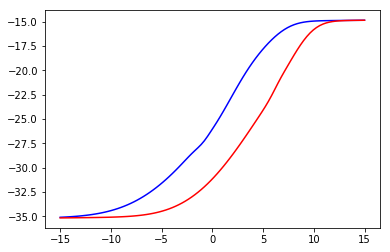

In [57]:
plt.plot(Vbot,F1,'b')
plt.plot(Vtop,F2,'r')

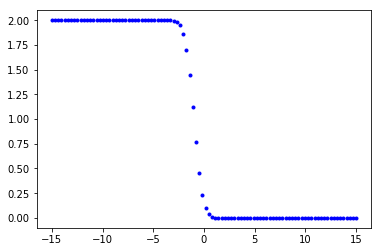

In [58]:
plt.plot(Vtop,special.erfc((Vbot-C1)/D1),'b.')

In [59]:
date = {'dfsa':100,'dfsad':200}

In [60]:
for key,value in date.items():
    print (key,value)

dfsa 100
dfsad 200


In [185]:
Vbot = np.linspace(-15,15,96)
Vtop = np.linspace(-15,15,96)

Fx = []
Fy = []

for k in range(1000):
    a1 = np.random.uniform(-6,-4,2)
    a2 = np.random.uniform(2,4,2)
    a3 = np.random.uniform(11,13,2)
    a4 = np.random.uniform(14,16,2)
    a5 = np.random.uniform(1,3,2)
    a6 = np.random.uniform(9,11,2)
    a7 = np.random.uniform(0,1,2)
    b1 = np.random.uniform(1, 1, 2)
    b2 = np.random.uniform(4, 6, 2)
    b3 = np.random.uniform(1, 1, 2)
    b4 = np.random.uniform(4, 6, 2)
    b5 = np.random.uniform(1, 1, 2)
    b6 = np.random.uniform(4, 6, 2)
    b7 = np.random.uniform(1, 1, 2)
    b8 = np.random.uniform(4, 6, 2)
    b9 = np.random.uniform(1, 1, 2)
    b10 = np.random.uniform(4, 6, 2)
    b11 = np.random.uniform(1, 1, 2)
    b12 = np.random.uniform(4, 6, 2)
    Al1= np.random.uniform(2,4,2)
    Al2= np.random.uniform(-3,-1,2)
    Al3= np.random.uniform(-7,-5,2)
    Au1= np.random.uniform(-9,-7,2)
    Au2= np.random.uniform(-5,-3,2)
    Au3= np.random.uniform(-1,1,2)
    C1 = np.random.uniform(-2,0,2)
    C2 = np.random.uniform(-2,0,2)
    C3 = np.random.uniform(-2,0,2)
    C4 = np.random.uniform(5,7,2)
    C5 = np.random.uniform(5,7,2)
    C6 = np.random.uniform(5,7,2)
    D1 = np.random.uniform(0,2,2)
    D2 = np.random.uniform(0,2,2)
    D3 = np.random.uniform(0,2,2)
    D4 = np.random.uniform(0,2,2)
    D5 = np.random.uniform(0,2,2)
    D6 = np.random.uniform(0,2,2)
    
    x = np.random.randint(2)
    y = np.random.randint(2)
    m = np.random.randint(2)
    n = np.random.randint(2)
    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])
    
    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])
    
    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot,x,y)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop,x,y)
    
    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot,m,n)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop,m,n)
    
    
    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3,F5,F4),axis=None)
    Fx.append(Fx_)
    
    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31,F51,F41),axis = None)
    Fy.append(Fy_)
    
    
    


In [67]:
def reshape_loop(F1,F2):
    F11 = np.asarray(F1)
    F21 = np.asarray(F2)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31,F51,F41),axis = None)
    return Fy_

In [190]:
a = np.asarray(Fx)
b = np.atleast_3d(a)

In [196]:
c=b[900:1000]

In [197]:
c.shape

(100, 192, 1)

In [68]:
Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)
Fx.shape
Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

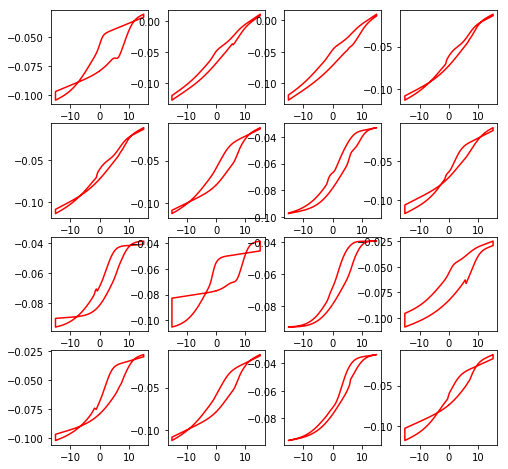

In [69]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,4):
    for j in range(0,4):
        k = np.random.randint(0, Fx.shape[0])
        ax = axs[i,j]
        ax.plot(reshape_loop(Vbot,Vtop),
                Fx_3d[k],'r-')
        
        

In [12]:
auto_test = load_model('resnet_pie_embedding')

In [13]:
result = auto_test.predict(Fx_3d)

f_y5 = Fx_3d
f_y6 = Fy_3d
f_fit = result

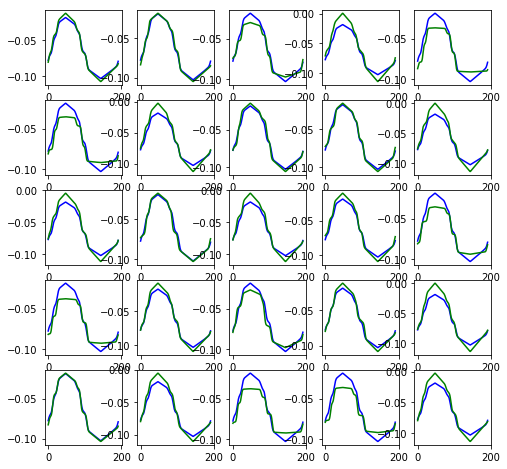

In [23]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(f_fit[k],'b-')
        ax.plot(f_y6[k],'g-')

In [17]:
auto_test.evaluate()

ValueError: If evaluating from data tensors, you should specify the `steps` argument.

In [111]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = Attention()([X,X_shortcut])
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = LayerNormalization(axis=1 , center=True , scale=True)(X)
    X = layers.Activation('relu')(X)
    
    return X

In [112]:
def decode_identity_block(X, stage, block, size, n_step, drop_frac, l2_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                                  activity_regularizer=l2(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    #X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = LayerNormalization(axis=1 , center=True , scale=True)(X)
    X = layers.Activation('relu')(X)
    
    return X

In [117]:
def ResNet50(lr=3e-5, size=256, drop_frac=0, n_step=96, embedding = 16, l2_norm = 1e-4):

    X_input = layers.Input(shape=(n_step,1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l2_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l2_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l2_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                             activity_regularizer=l2(l2_norm)),input_shape=(n_step, 1))(X)
    #X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding,activation='relu',name='embedding_layer',activity_regularizer=l2(l2_norm))(X)
    X = layers.RepeatVector(n_step)(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac, 
                             activity_regularizer=l2(l2_norm)))(X)
    
    #X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l2_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l2_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l2_norm)
    
    X = layers.BatchNormalization(axis = 1, name = 'batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model

In [118]:
tensorflow.keras.__version__

'2.2.4-tf'

In [119]:
Try  = ResNet50()

In [120]:
Try.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
attention_3 (Attention)         (None, 96, 1)        0           input_16[0][0]                   
                                                                 input_16[0][0]                   
__________________________________________________________________________________________________
bidirectional_60 (Bidirectional (None, 96, 512)      528384      attention_3[0][0]                
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 96, 512)      0           bidirectional_60[0][0]    

In [59]:
Vbot = np.linspace(-15, 15, 96)
Vtop = np.linspace(-15, 15, 96)
Fx = []
Fy = []

for k in range(100000):
    a1 = np.random.uniform(-6, -4, 2)
    a2 = np.random.uniform(2, 4, 2)
    a3 = np.random.uniform(11, 13, 2)
    a4 = np.random.uniform(14, 16, 2)
    a5 = np.random.uniform(1, 3, 2)
    a6 = np.random.uniform(9, 11, 2)
    a7 = np.random.uniform(0, 1, 2)
    b1 = np.random.uniform(1, 1, 2)
    b2 = np.random.uniform(1, 1, 2)
    b3 = np.random.uniform(1, 1, 2)
    b4 = np.random.uniform(1, 1, 2)
    b5 = np.random.uniform(1, 1, 2)
    b6 = np.random.uniform(1, 1, 2)
    b7 = np.random.uniform(1, 1, 2)
    b8 = np.random.uniform(1, 1, 2)
    b9 = np.random.uniform(1, 1, 2)
    b10 = np.random.uniform(1, 1, 2)
    b11 = np.random.uniform(1, 1, 2)
    b12 = np.random.uniform(1, 1, 2)
    Al1 = np.random.uniform(2, 4, 2)
    Al2 = np.random.uniform(-3, -1, 2)
    Al3 = np.random.uniform(-7, -5, 2)
    Au1 = np.random.uniform(-9, -7, 2)
    Au2 = np.random.uniform(-5, -3, 2)
    Au3 = np.random.uniform(-1, 1, 2)
    C1 = np.random.uniform(-2, 0, 2)
    C2 = np.random.uniform(-2, 0, 2)
    C3 = np.random.uniform(-2, 0, 2)
    C4 = np.random.uniform(5, 7, 2)
    C5 = np.random.uniform(5, 7, 2)
    C6 = np.random.uniform(5, 7, 2)
    D1 = np.random.uniform(0, 2, 2)
    D2 = np.random.uniform(0, 2, 2)
    D3 = np.random.uniform(0, 2, 2)
    D4 = np.random.uniform(0, 2, 2)
    D5 = np.random.uniform(0, 2, 2)
    D6 = np.random.uniform(0, 2, 2)

    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])

    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])

    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop)

    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop)

    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3, F5, F4), axis=None)
    Fx.append(Fx_)

    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31, F51, F41), axis=None)
    Fy.append(Fy_)

Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)

Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

NameError: name 's_1' is not defined

In [70]:
Vbot = np.linspace(-15, 15, 96)
Vtop = np.linspace(-15, 15, 96)
Fx = []
Fy = []

for k in range(1000):
    a1 = np.random.uniform(-6, -4, 2)
    a2 = np.random.uniform(2, 4, 2)
    a3 = np.random.uniform(11, 13, 2)
    a4 = np.random.uniform(14, 16, 2)
    a5 = np.random.uniform(1, 3, 2)
    a6 = np.random.uniform(9, 11, 2)
    a7 = np.random.uniform(0, 1, 2)
    b1 = np.random.uniform(0, 2, 2)
    b2 = np.random.uniform(4, 6, 2)
    b3 = np.random.uniform(0, 2, 2)
    b4 = np.random.uniform(4, 6, 2)
    b5 = np.random.uniform(0, 2, 2)
    b6 = np.random.uniform(4, 6, 2)
    b7 = np.random.uniform(0, 2, 2)
    b8 = np.random.uniform(4, 6, 2)
    b9 = np.random.uniform(0, 2, 2)
    b10 = np.random.uniform(4, 6, 2)
    b11 = np.random.uniform(0, 2, 2)
    b12 = np.random.uniform(4, 6, 2)
    Al1 = np.random.uniform(2, 4, 2)
    Al2 = np.random.uniform(-3, -1, 2)
    Al3 = np.random.uniform(-7, -5, 2)
    Au1 = np.random.uniform(-9, -7, 2)
    Au2 = np.random.uniform(-5, -3, 2)
    Au3 = np.random.uniform(-1, 1, 2)
    C1 = np.random.uniform(-2, 0, 2)
    C2 = np.random.uniform(-2, 0, 2)
    C3 = np.random.uniform(-2, 0, 2)
    C4 = np.random.uniform(5, 7, 2)
    C5 = np.random.uniform(5, 7, 2)
    C6 = np.random.uniform(5, 7, 2)
    D1 = np.random.uniform(0, 2, 2)
    D2 = np.random.uniform(0, 2, 2)
    D3 = np.random.uniform(0, 2, 2)
    D4 = np.random.uniform(0, 2, 2)
    D5 = np.random.uniform(0, 2, 2)
    D6 = np.random.uniform(0, 2, 2)
    x = np.random.randint(2)
    y = np.random.randint(2)
    m = np.random.randint(2)
    n = np.random.randint(2)
    s1 = s_1(b1[0], b2[0], Vbot, C1[0], D1[0])
    s2 = s_2(b3[0], b4[0], Vbot, C2[0], D2[0])
    s3 = s_3(b5[0], b6[0], Vbot, C3[0], D3[0])
    s4 = s_4(b7[0], b8[0], Vtop, C4[0], D4[0])
    s5 = s_5(b9[0], b10[0], Vtop, C5[0], D5[0])
    s6 = s_6(b11[0], b12[0], Vtop, C6[0], D6[0])

    s11 = s_1(b1[1], b2[1], Vbot, C1[1], D1[1])
    s21 = s_2(b3[1], b4[1], Vbot, C2[1], D2[1])
    s31 = s_3(b5[1], b6[1], Vbot, C3[1], D3[1])
    s41 = s_4(b7[1], b8[1], Vtop, C4[1], D4[1])
    s51 = s_5(b9[1], b10[1], Vtop, C5[1], D5[1])
    s61 = s_6(b11[1], b12[1], Vtop, C6[1], D6[1])

    F1 = F_1(a1[0], a2[0], a3[0], a4[0], a7[0], Al1[0], Al2[0], Al3[0], s1, s2, s3, Vbot, x, y)
    F2 = F_2(a1[0], a5[0], a6[0], a4[0], a7[0], Au1[0], Au2[0], Au3[0], s4, s5, s6, Vtop, x, y)

    F11 = F_1(a1[1], a2[1], a3[1], a4[1], a7[1], Al1[1], Al2[1], Al3[1], s11, s21, s31, Vbot, m, n)
    F21 = F_2(a1[1], a5[1], a6[1], a4[1], a7[1], Au1[1], Au2[1], Au3[1], s41, s51, s61, Vtop, m, n)

    F1 = np.asarray(F1)
    F2 = np.asarray(F2)
    F4 = F2[0:48]
    F3 = F2[48:96]
    F5 = np.flip(F1)
    Fx_ = np.concatenate((F3, F5, F4), axis=None)
    Fx.append(Fx_)

    F11 = np.asarray(F11)
    F21 = np.asarray(F21)
    F41 = F21[0:48]
    F31 = F21[48:96]
    F51 = np.flip(F11)
    Fy_ = np.concatenate((F31, F51, F41), axis=None)
    Fy.append(Fy_)

Fx = preprocessing.normalize(Fx)
Fx = np.asarray(Fx)
Fy = preprocessing.normalize(Fy)
Fy = np.asarray(Fy)

Fx_3d = np.atleast_3d(Fx)
Fy_3d = np.atleast_3d(Fy)

In [71]:
new_model = load_model('resnet_pie_embedding_size128')

In [72]:
result = new_model.predict(Fx_3d)

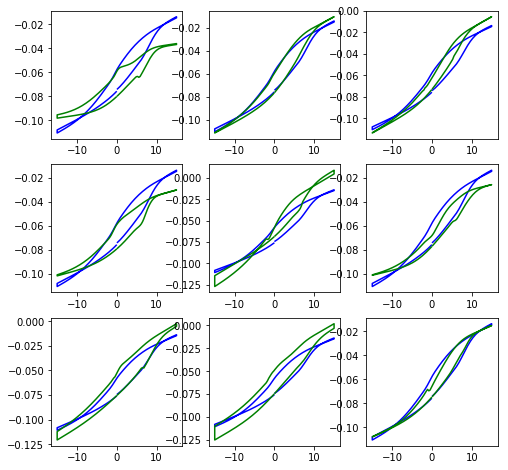

In [77]:
f_y5 = Fx_3d
f_y6 = Fy_3d
f_fit = result
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,3):
    for j in range(0,3):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(reshape_loop(Vbot,Vtop),f_fit[k],'b-')
        ax.plot(reshape_loop(Vbot,Vtop),f_y6[k],'g-')